<a href="https://colab.research.google.com/github/PilarAriasVazquez/deeplearning/blob/main/Ejercicio%20Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [26]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [27]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()# Descarga los datos de MNIST

In [28]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [29]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
validation_images = train_images[50000:]
validation_labels = train_labels[50000:]
train_images = train_images[:49999]
train_labels = train_labels[:49999]


In [30]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  network = models.Sequential()
  if regularizador==0:
    network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
  elif regularizador==1:
    network.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28*28,))) 
  elif regularizador==2:
    network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28*28,))) 
  elif regularizador==3:    
    network.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(28*28,))) 
  elif regularizador==4: 
    network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
    network.add(layers.Dropout(0.5))
  else: 
    print('Error, no se ha introducido un valor válido')
  network.add(layers.Dense(10, activation='softmax'))      
  network.summary()
  return network

In [31]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return modelo

In [32]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  history= modelo.fit(train_images, train_labels,
                       epochs=30, batch_size=128,
                       validation_data=(validation_images, validation_labels))
  return history

In [33]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [34]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [35]:
network0 = crea_modelo(0)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [36]:
network0 = compila_modelo(network0)

In [37]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 6s 12ms/step - loss: 0.2815 - accuracy: 0.9172 - val_loss: 0.1658 - val_accuracy: 0.9521
Epoch 2/30
391/391 [==============================] - 3s 9ms/step - loss: 0.1135 - accuracy: 0.9666 - val_loss: 0.1022 - val_accuracy: 0.9692
Epoch 3/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0743 - accuracy: 0.9774 - val_loss: 0.0816 - val_accuracy: 0.9764
Epoch 4/30
391/391 [==============================] - 2s 5ms/step - loss: 0.0537 - accuracy: 0.9842 - val_loss: 0.0896 - val_accuracy: 0.9751
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0406 - accuracy: 0.9883 - val_loss: 0.0883 - val_accuracy: 0.9763
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0300 - accuracy: 0.9910 - val_loss: 0.0843 - val_accuracy: 0.9791
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0228 - accuracy: 0.9935 - val_loss: 0.0764 - val_accuracy: 0.9800
Epoch

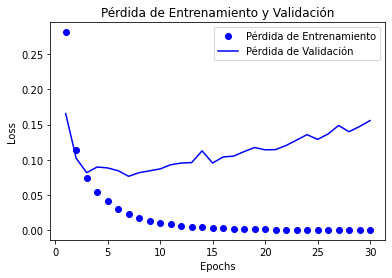

In [38]:
pinta_perdida_entrenamiento_validacion(historia0)

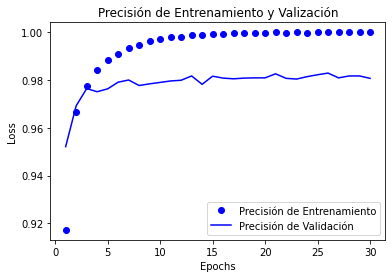

In [39]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [40]:
network1 = crea_modelo(1)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [41]:
network1 = compila_modelo(network1)

In [42]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1564 - accuracy: 0.8438 - val_loss: 1.0199 - val_accuracy: 0.8889
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.9605 - accuracy: 0.8809 - val_loss: 0.9171 - val_accuracy: 0.8855
Epoch 3/30
391/391 [==============================] - 2s 5ms/step - loss: 0.8391 - accuracy: 0.9018 - val_loss: 0.7513 - val_accuracy: 0.9269
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7605 - accuracy: 0.9160 - val_loss: 0.7503 - val_accuracy: 0.9201
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7097 - accuracy: 0.9239 - val_loss: 0.6547 - val_accuracy: 0.9367
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6755 - accuracy: 0.9303 - val_loss: 0.6511 - val_accuracy: 0.9333
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6494 - accuracy: 0.9344 - val_loss: 0.6027 - val_accuracy: 0.9472
Epoch 

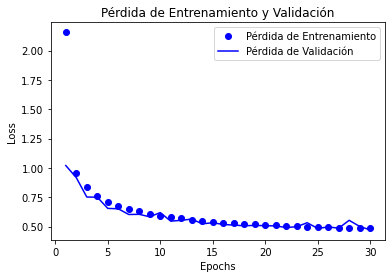

In [43]:
pinta_perdida_entrenamiento_validacion(historia1)

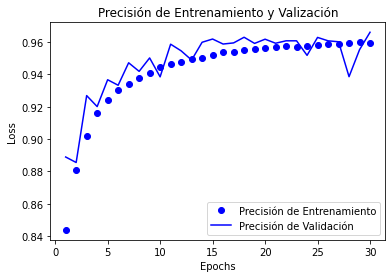

In [44]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [45]:
network2 = crea_modelo(2)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               401920    
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [46]:
network2 = compila_modelo(network2)

In [47]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5294 - accuracy: 0.9114 - val_loss: 0.3060 - val_accuracy: 0.9511
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2661 - accuracy: 0.9532 - val_loss: 0.2192 - val_accuracy: 0.9627
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2104 - accuracy: 0.9624 - val_loss: 0.2026 - val_accuracy: 0.9660
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1868 - accuracy: 0.9667 - val_loss: 0.1727 - val_accuracy: 0.9719
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1716 - accuracy: 0.9706 - val_loss: 0.1570 - val_accuracy: 0.9755
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1624 - accuracy: 0.9719 - val_loss: 0.1542 - val_accuracy: 0.9750
Epoch 7/30
391/391 [==============================] - 2s 5ms/step - loss: 0.1562 - accuracy: 0.9730 - val_loss: 0.1486 - val_accuracy: 0.9752
Epoch 

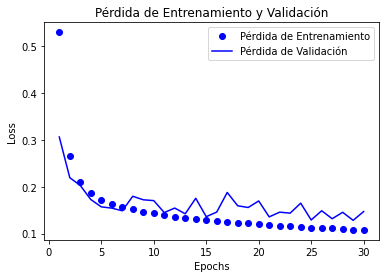

In [48]:
pinta_perdida_entrenamiento_validacion(historia2)

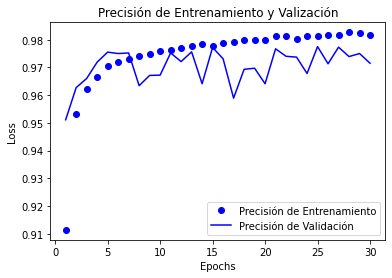

In [49]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [50]:
network3 = crea_modelo(3)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [51]:
network3 = compila_modelo(network3)

In [52]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1832 - accuracy: 0.8415 - val_loss: 1.0121 - val_accuracy: 0.8883
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.9930 - accuracy: 0.8724 - val_loss: 0.8725 - val_accuracy: 0.9052
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8724 - accuracy: 0.8943 - val_loss: 0.7716 - val_accuracy: 0.9225
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7905 - accuracy: 0.9102 - val_loss: 0.7583 - val_accuracy: 0.9199
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7354 - accuracy: 0.9210 - val_loss: 0.6965 - val_accuracy: 0.9359
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6980 - accuracy: 0.9270 - val_loss: 0.6545 - val_accuracy: 0.9344
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6654 - accuracy: 0.9334 - val_loss: 0.6434 - val_accuracy: 0.9400
Epoch 

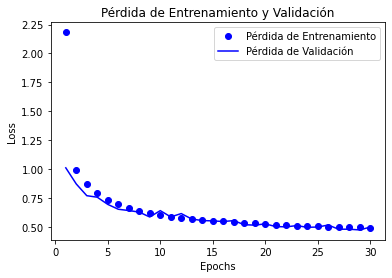

In [53]:
pinta_perdida_entrenamiento_validacion(historia3)

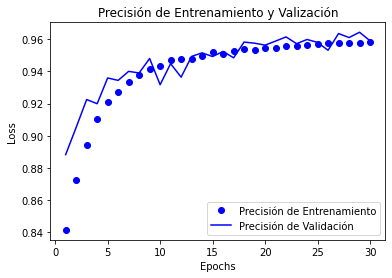

In [54]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [55]:
network4 = crea_modelo(4)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [56]:
network4 = compila_modelo(network4)

In [57]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3461 - accuracy: 0.8983 - val_loss: 0.1655 - val_accuracy: 0.9536
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1706 - accuracy: 0.9486 - val_loss: 0.1141 - val_accuracy: 0.9673
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1295 - accuracy: 0.9616 - val_loss: 0.1033 - val_accuracy: 0.9705
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1050 - accuracy: 0.9684 - val_loss: 0.0887 - val_accuracy: 0.9735
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0899 - accuracy: 0.9728 - val_loss: 0.0808 - val_accuracy: 0.9765
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0834 - accuracy: 0.9750 - val_loss: 0.0828 - val_accuracy: 0.9775
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0760 - accuracy: 0.9775 - val_loss: 0.0762 - val_accuracy: 0.9780
Epoch 

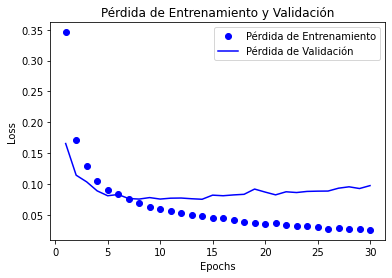

In [58]:
pinta_perdida_entrenamiento_validacion(historia4)

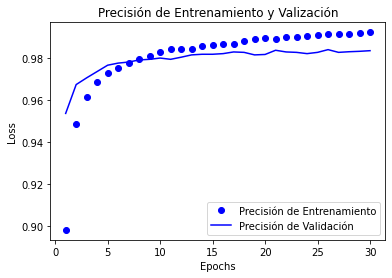

In [59]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [60]:
network5 = crea_modelo(5)

Error, no se ha introducido un valor válido


ValueError: ignored

### CONCLUSIONES